Часть 2 ВКР Комаровой О.А.
Обучить алгоритм машинного обучения, который будет определять значения:
-	Модуль упругости при растяжении, ГПа
-	Прочность при растяжении, МПа


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [5]:
import pandas as pd
# читаем 2 excel files
data1 = pd.read_excel('X_bp.xlsx')
data2 = pd.read_excel('X_nup.xlsx')
  
# объединяем по индексу, тип объединения INNER
compozit = pd.merge(data1, data2, 
                   how='inner')
  
compozit.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [6]:
#Удаляем первый неинформативный столбец 
compozit.drop(['Unnamed: 0'], axis=1, inplace=True) 
#Посмотрим на первые 5 строк 
compozit.head() 

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [7]:
# MinMaxScaler Нормализация
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
names = compozit.columns 
# Обучим MinMaxScaler
compozit_norm = minmax_scaler.fit_transform(np.array(compozit))

In [8]:
#Вернем названия столбцов(преобразуем обратно в датафрейм)
compozit_norm_df = pd.DataFrame(data = compozit_norm, columns=names)
compozit_norm_df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135


In [9]:
compozit_norm_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,0.488427,0.512533,0.386301,0.512273,0.426215,0.593354,0.344638,0.497880,0.508634,0.484838,0.491691,0.477768,0.549616
std,0.175541,0.154890,0.172978,0.156147,0.128370,0.130695,0.201092,0.167435,0.172724,0.156875,0.500175,0.177519,0.118772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370696,0.404175,0.260652,0.412240,0.338919,0.507756,0.190296,0.386030,0.390881,0.382955,0.000000,0.351790,0.478890
50%,0.483912,0.516497,0.386165,0.512240,0.425487,0.593401,0.322574,0.494672,0.506003,0.486875,0.000000,0.478940,0.551423
75%,0.608045,0.608413,0.502528,0.618003,0.517842,0.679924,0.495105,0.606751,0.615432,0.587411,1.000000,0.594597,0.624537
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Очищаем признаки от выбросов
#Создадим переменную со списком всех параметров, в которых есть выбросы 
compozit_norm_df.columns 
column_list_drop = ["Соотношение матрица-наполнитель",    
                               "Плотность, кг/м3",                  
                               "модуль упругости, ГПа",                  
                               "Количество отвердителя, м.%",                  
                               "Содержание эпоксидных групп,%_2",                  
                               "Температура вспышки, С_2",                  
                               "Поверхностная плотность, г/м2",                  
                               "Модуль упругости при растяжении, ГПа",                  
                               "Прочность при растяжении, МПа",                  
                               "Потребление смолы, г/м2",                  
                               "Шаг нашивки",                  
                               "Плотность нашивки"] 

In [11]:
# Исключим выбросы, очистим данные от выбросов методом межквартильного расстояния (далее 1,5 межквартильных размахов) 
# Выбор сделан в пользу этого метода, потому что хотим добиться в данной работе полностью избавления от выборов, 
# и метод межквартильного расстояния позволяет удалить практически 10% датасета сразу 
for i in column_list_drop:     
    q75, q25 = np.percentile(compozit_norm_df.loc[:,i], [75,25])     
    intr_qr = q75 - q25     
    max = q75 + (1.5 * intr_qr)     
    min = q25 - (1.5 * intr_qr)     
    compozit_norm_df.loc[compozit_norm_df[i] < min, i] = np.nan     
    compozit_norm_df.loc[compozit_norm_df[i] > max, i] = np.nan  

In [12]:
# Посмотрим на сумму выбросов по каждому из столбцов 
compozit_norm_df.isnull().sum() 

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [13]:
# Всего 93 выброса. 
# Удаляем строки c выбросами 
compozit_norm_df = compozit_norm_df.dropna(axis=0) 

In [14]:
# Снова посмотрим на сумму выбросов по каждому из столбцов, чтобы убедиться, что все работает 
compozit_norm_df.isnull().sum() 

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [15]:
# Создадим 1norm-модель линейной регрессии для признака Модуль упругости при растяжении, ГПа, используя все остальные признаки

In [16]:
# Разбиваем датасет на тестовую и обучающую выборки
X_norm1 = compozit_norm_df[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 
                   'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 
                   'Поверхностная плотность, г/м2', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 
                   'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
y_norm1 = compozit_norm_df['Модуль упругости при растяжении, ГПа']
X_train_norm1, X_test_norm1, y_train_norm1, y_test_norm1 = train_test_split(X_norm1, y_norm1, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [17]:
# выведем исходный размер массива признаков (X_norn1)
X_norm1.shape

(936, 12)

In [18]:
# теперь посмотрим, что сделала функция train_test_split
print(X_train_norm1.shape, X_test_norm1.shape)

(655, 12) (281, 12)


In [19]:
y_norm1.shape

(936,)

In [20]:
# Построим линейную регрессионную модель
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model_norm1 = linear_model.LinearRegression()
model_norm1.fit(X_train_norm1, y_train_norm1)
y_pred_norm1 = model_norm1.predict(X_test_norm1)

In [21]:
print(model_norm1.intercept_) # Сообщение о перехватах

0.45603361449828567


In [22]:
# Посмотрим коэффициенты
pd.DataFrame(model_norm1.coef_, X_norm1.columns, columns = ['Coeff'])

,Coeff
Соотношение матрица-наполнитель,-0.032875
"Плотность, кг/м3",-0.021271
"модуль упругости, ГПа",0.055470
"Количество отвердителя, м.%",-0.060999
"Содержание эпоксидных групп,%_2",0.070317
"Температура вспышки, С_2",0.006468
"Поверхностная плотность, г/м2",0.035207
"Прочность при растяжении, МПа",-0.020968
"Потребление смолы, г/м2",0.045888
"Угол нашивки, град",0.006904


In [23]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 

In [24]:
print('MAE_norm1: %.2f' % mean_absolute_error(y_test_norm1, y_pred_norm1)) # Средняя абсолютная ошибка(MAE)
print('MSE_norm1: %.2f' % mean_squared_error(y_test_norm1, y_pred_norm1)) # Средняя квадратичная ошибка(MSE)
print('RMSE_norm1: %.2f' % np.sqrt(metrics.mean_squared_error(y_test_norm1, y_pred_norm1))) # Корень из среднеквадратичной ошибки(RMSE)
print('Median absolute error_norm1: %.2f' % median_absolute_error(y_test_norm1, y_pred_norm1)) # Медианная абсолютная ошибка (Median absolute error)
print('R^2_norm1: %.2f' % r2_score(y_test_norm1, y_pred_norm1)) # Метрика R2 или Коэффициент детерминации

MAE_norm1: 0.13
MSE_norm1: 0.03
RMSE_norm1: 0.16
Median absolute error_norm1: 0.11
R^2_norm1: -0.01


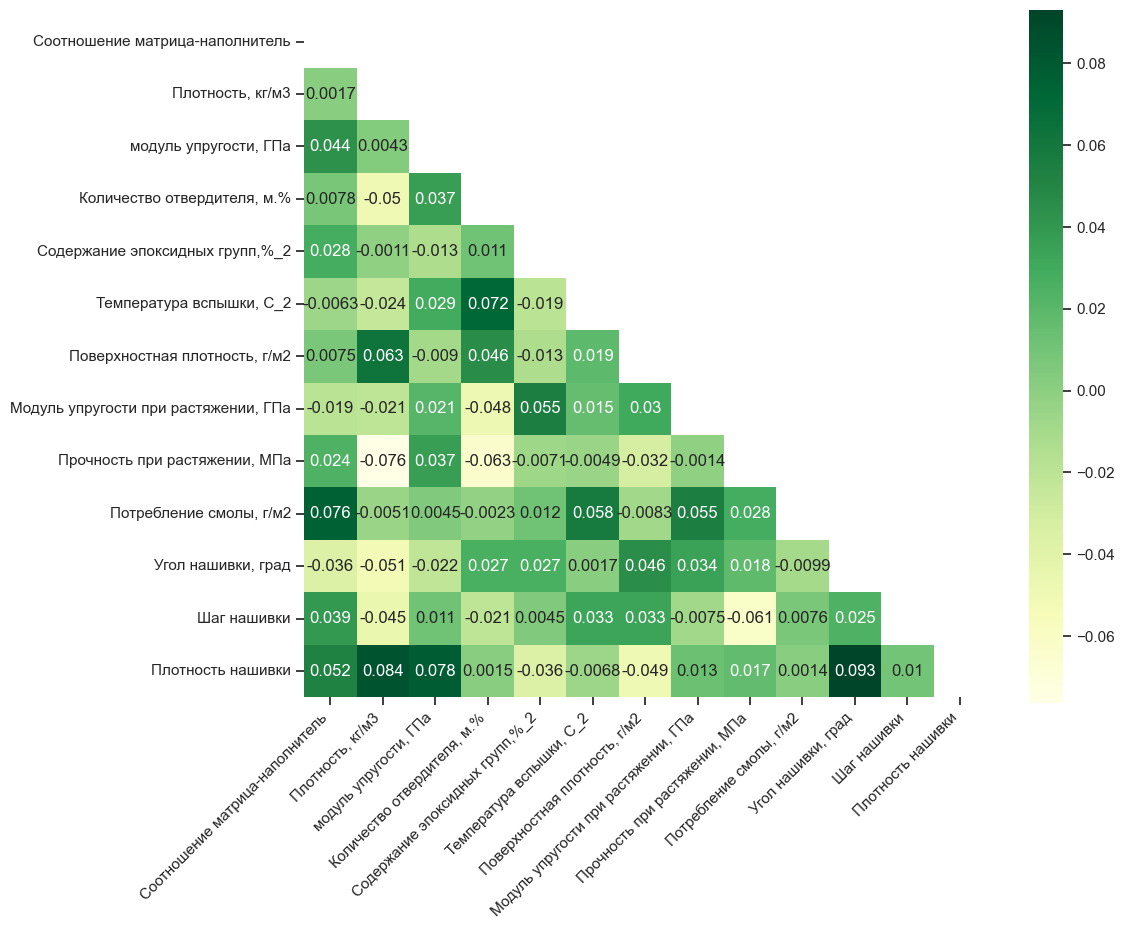

In [25]:
#Визуализация корреляционной матрицы с помощью тепловой карты 
mask = np.triu(compozit_norm_df.corr())
# Создаем полотно для отображения большого графика 
f, ax = plt.subplots(figsize = (11, 9)) 
# Визуализируем данные кореляции и создаем цветовую палитру 
sns.heatmap(compozit_norm_df.corr(), mask = mask, annot = True, square = True, cmap = 'YlGn') 
plt.xticks(rotation = 45, ha='right') 
plt.show() 
# Максимальная корреляция между Плотностью нашивки и углом нашивки и составляет 0.11, 
# что говорит об отсутствии зависимости между этими данными.  
# Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными. 

In [26]:
# Разбиваем датасет на тестовую и обучающую выборки
X_norm2 = compozit_norm_df[['Содержание эпоксидных групп,%_2',  'Потребление смолы, г/м2']]
y_norm2 = compozit_norm_df['Модуль упругости при растяжении, ГПа']
X_train_norm2, X_test_norm2, y_train_norm2, y_test_norm2 = train_test_split(X_norm2, y_norm2, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [27]:
# посмотрим, что сделала функция train_test_split
print(X_train_norm2.shape, X_test_norm2.shape)

(655, 2) (281, 2)


In [28]:
model_norm2 = LinearRegression().fit(X_norm2,y_norm2)
y_pred_norm2 = model_norm2.predict(X_test_norm2)
print(model_norm2.intercept_) # Сообщение о перехватах

0.43884116677223806


In [29]:
# Посмотрим коэффициенты
pd.DataFrame(model_norm2.coef_, X_norm2.columns, columns = ['Coeff'])

,Coeff
"Содержание эпоксидных групп,%_2",0.069736
"Потребление смолы, г/м2",0.058399


In [30]:
print('MAE_norm2: %.2f' % mean_absolute_error(y_test_norm2, y_pred_norm2)) # Средняя абсолютная ошибка(MAE)
print('MSE_norm2: %.2f' % mean_squared_error(y_test_norm2, y_pred_norm2)) # Средняя квадратичная ошибка(MSE)
print('RMSE_norm2: %.2f' % np.sqrt(metrics.mean_squared_error(y_test_norm2, y_pred_norm2))) # Корень из среднеквадратичной ошибки(RMSE)
print('Median absolute error_norm2: %.2f' % median_absolute_error(y_test_norm2, y_pred_norm2)) # Медианная абсолютная ошибка (Median absolute error)
print('R^2_norm2: %.2f' % r2_score(y_test_norm2, y_pred_norm2)) # Метрика R2 или Коэффициент детерминации

MAE_norm2: 0.13
MSE_norm2: 0.02
RMSE_norm2: 0.16
Median absolute error_norm2: 0.11
R^2_norm2: 0.01


In [31]:
# StandardScaler Стандартизация предварительно очищенных данных

In [32]:
compozit.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [33]:
compozit_df = pd.DataFrame(compozit)

In [34]:
# Посмотрим на сумму выбросов по каждому из столбцов 
compozit_df.isnull().sum() 

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
# Обучим StandardScaler
compozit_std = std_scaler.fit_transform(np.array(compozit_df))

In [36]:
#Вернем названия столбцов(преобразуем обратно в датафрейм)
compozit_std_df = pd.DataFrame(data = compozit_std, columns=names)
compozit_std_df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.175779,0.736365,-0.003594,-2.848828,0.009757,-4.542215,-0.969964,-1.06772,1.098244,0.02641,-0.983518,-1.131530,-0.012469
1,-1.175779,0.736365,-0.003594,-2.141666,0.626001,-0.030955,-0.969964,-1.06772,1.098244,0.02641,-0.983518,-1.131530,0.230546
2,-1.175779,0.736365,-0.003594,-2.145202,4.471955,-0.030955,-0.969964,-1.06772,1.098244,0.02641,-0.983518,-1.131530,1.040595
3,-1.175779,0.736365,-0.003594,0.651622,-0.413446,0.344984,-0.969964,-1.06772,1.098244,0.02641,-0.983518,-0.741243,-0.822518
4,-0.174232,0.736365,0.039618,0.045585,0.009757,-0.030955,-0.969964,-1.06772,1.098244,0.02641,-0.983518,-0.741243,-0.012469


In [37]:
compozit_std_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03,1.023000e+03
mean,-4.102290e-17,8.510625e-16,3.777797e-16,-5.013910e-17,-3.429428e-17,4.692673e-16,6.565835e-17,-9.653405e-17,7.937606e-16,-2.799976e-16,-2.757434e-15,-2.967649e-16,4.688332e-17
std,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00,1.000489e+00
min,-2.783776e+00,-3.310622e+00,-2.234332e+00,-3.282308e+00,-3.321825e+00,-4.542215e+00,-1.714677e+00,-2.975023e+00,-2.946217e+00,-3.092116e+00,-9.835180e-01,-2.692680e+00,-4.629749e+00
25%,-6.710072e-01,-6.999212e-01,-7.267418e-01,-6.409455e-01,-6.803619e-01,-6.552663e-01,-7.678973e-01,-6.683499e-01,-6.820742e-01,-6.497697e-01,-9.835180e-01,-7.100068e-01,-5.957682e-01
50%,-2.573263e-02,2.560303e-02,-7.843941e-04,-2.096293e-04,-5.673631e-03,3.582556e-04,-1.097794e-01,-1.917160e-02,-1.524199e-02,1.299248e-02,-9.835180e-01,6.604358e-03,1.522815e-02
75%,6.817601e-01,6.193176e-01,6.722489e-01,6.774466e-01,7.141185e-01,6.627029e-01,7.486141e-01,6.505431e-01,6.186158e-01,6.541739e-01,1.016758e+00,6.584426e-01,6.311118e-01
max,2.915695e+00,3.148712e+00,3.549589e+00,3.125033e+00,4.471955e+00,3.112932e+00,3.260615e+00,3.000355e+00,2.846190e+00,3.285517e+00,1.016758e+00,2.943275e+00,3.793863e+00


In [38]:
# Создадим 1std-модель линейной регрессии для признака Модуль упругости при растяжении, ГПа, используя все остальные признаки

In [39]:
# Разбиваем датасет на тестовую и обучающую выборки
X_std1 = compozit_std_df[['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 
                   'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 
                   'Поверхностная плотность, г/м2', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 
                   'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']]
y_std1 = compozit_std_df['Модуль упругости при растяжении, ГПа']
X_train_std1, X_test_std1, y_train_std1, y_test_std1 = train_test_split(X_std1, y_std1, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [40]:
# выведем исходный размер массива признаков (X_std1)
X_std1.shape

(1023, 12)

In [41]:
# теперь посмотрим, что сделала функция train_test_split
print(X_train_std1.shape, X_test_std1.shape)

(716, 12) (307, 12)


In [42]:
# Построим линейную регрессионную модель
model_std1 = linear_model.LinearRegression()
model_std1.fit(X_train_std1, y_train_std1)
y_pred_std1 = model_std1.predict(X_test_std1)

In [43]:
print(model_std1.intercept_) # Сообщение о перехватах

-0.03816734850984922


In [44]:
# Посмотрим коэффициенты
pd.DataFrame(model_std1.coef_, X_std1.columns, columns = ['Coeff'])

,Coeff
Соотношение матрица-наполнитель,-0.017189
"Плотность, кг/м3",-0.022333
"модуль упругости, ГПа",0.017560
"Количество отвердителя, м.%",-0.089734
"Содержание эпоксидных групп,%_2",0.050003
"Температура вспышки, С_2",0.059628
"Поверхностная плотность, г/м2",0.018350
"Прочность при растяжении, МПа",-0.025663
"Потребление смолы, г/м2",0.039412
"Угол нашивки, град",0.022147


In [45]:
print('MAE_std1: %.2f' % mean_absolute_error(y_test_std1, y_pred_std1)) # Средняя абсолютная ошибка(MAE)
print('MSE_std1: %.2f' % mean_squared_error(y_test_std1, y_pred_std1)) # Средняя квадратичная ошибка(MSE)
print('RMSE_std1: %.2f' % np.sqrt(metrics.mean_squared_error(y_test_std1, y_pred_std1))) # Корень из среднеквадратичной ошибки(RMSE)
print('Median absolute error_std1: %.2f' % median_absolute_error(y_test_std1, y_pred_std1)) # Медианная абсолютная ошибка (Median absolute error)
print('R^2_std1: %.2f' % r2_score(y_test_norm1, y_pred_norm1)) # Метрика R2 или Коэффициент детерминации

MAE_std1: 0.82
MSE_std1: 1.04
RMSE_std1: 1.02
Median absolute error_std1: 0.67
R^2_std1: -0.01


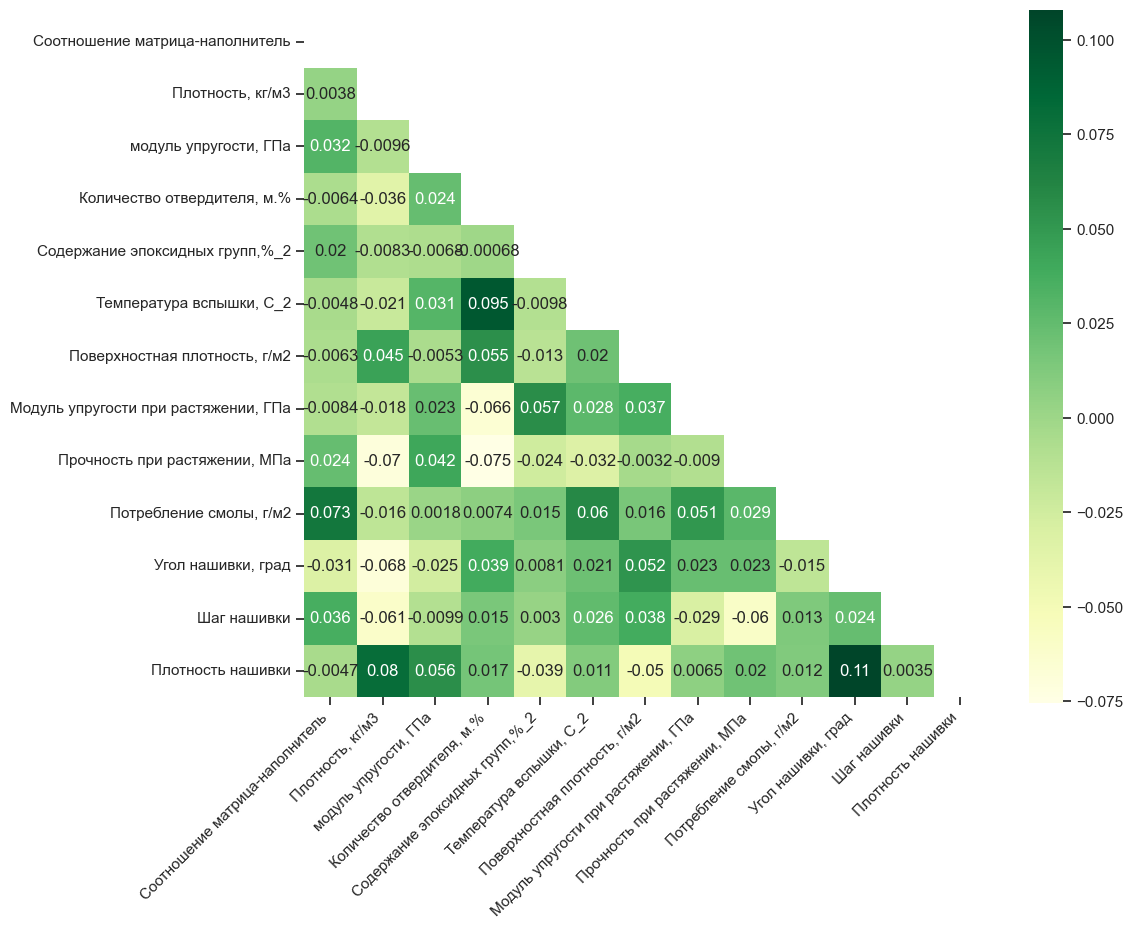

In [46]:
#Визуализация корреляционной матрицы с помощью тепловой карты 
mask = np.triu(compozit_std_df.corr())
# Создаем полотно для отображения большого графика 
f, ax = plt.subplots(figsize = (11, 9)) 
# Визуализируем данные кореляции и создаем цветовую палитру 
sns.heatmap(compozit_std_df.corr(), mask = mask, annot = True, square = True, cmap = 'YlGn') 
plt.xticks(rotation = 45, ha='right') 
plt.show() 
# Максимальная корреляция между Плотностью нашивки и углом нашивки и составляет 0.11, 
# что говорит об отсутствии зависимости между этими данными.  
# Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными. 

In [47]:
# Разбиваем датасет на тестовую и обучающую выборки
X_std2 = compozit_std_df[['Содержание эпоксидных групп,%_2',  'Потребление смолы, г/м2']]
y_std2 = compozit_std_df['Модуль упругости при растяжении, ГПа']
X_train_std2, X_test_std2, y_train_std2, y_test_std2 = train_test_split(X_std2, y_std2, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [48]:
# посмотрим, что сделала функция train_test_split
print(X_train_std2.shape, X_test_std2.shape)

(716, 2) (307, 2)


In [49]:
model_std2 = LinearRegression().fit(X_std2,y_std2)
y_pred_std2 = model_std2.predict(X_test_std2)
print(model_std2.intercept_) # Сообщение о перехватах

-9.26118190993544e-17


In [50]:
print('MAE_std2: %.2f' % mean_absolute_error(y_test_std2, y_pred_std2)) # Средняя абсолютная ошибка(MAE)
print('MSE_std2: %.2f' % mean_squared_error(y_test_std2, y_pred_std2)) # Средняя квадратичная ошибка(MSE)
print('RMSE_std2: %.2f' % np.sqrt(metrics.mean_squared_error(y_test_std2, y_pred_std2))) # Корень из среднеквадратичной ошибки(RMSE)
print('Median absolute error_std2: %.2f' % median_absolute_error(y_test_std2, y_pred_std2)) # Медианная абсолютная ошибка (Median absolute error)
print('R^2_std2: %.2f' % r2_score(y_test_std2, y_pred_std2)) # Метрика R2 или Коэффициент детерминации

MAE_std2: 0.81
MSE_std2: 1.02
RMSE_std2: 1.01
Median absolute error_std2: 0.68
R^2_std2: 0.00


In [51]:
# Из 4 созданных моделей линейной регрессии для определения значения "Модуля упругости при растяжении, ГПа" 
# наилучшей стала 2 Модель, построенная на MinMaxScaler-нормализованных данных по признакам 'Содержание эпоксидных групп,%_2',  
# 'Потребление смолы, г/м2'. 

In [52]:
# Создадим 5-ю модель линейной регрессии для определения значения "Прочность при растяжении, МПа". 
# Учитывая опыт построения предыдущей модели, будем работать на MinMaxScaler-нормализованных данных по одному признаку 
# 'модуль упругости, ГПа'. Так как хороших корреляционных связей между признаками не наблюдается.   

In [53]:
# Разбиваем датасет на тестовую и обучающую выборки
X_norm5 = compozit_norm_df[['модуль упругости, ГПа']]
y_norm5 = compozit_norm_df['Прочность при растяжении, МПа']
X_train_norm5, X_test_norm5, y_train_norm5, y_test_norm5 = train_test_split(X_norm5, y_norm5, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [54]:
model_norm5 = LinearRegression().fit(X_norm5,y_norm5)
y_pred_norm5 = model_norm5.predict(X_test_norm5)
print(model_norm5.intercept_) # Сообщение о перехватах

0.4953042970073457


In [55]:
# Посмотрим коэффициенты
pd.DataFrame(model_norm5.coef_, X_norm5.columns, columns = ['Coeff'])

,Coeff
"модуль упругости, ГПа",0.035108


In [56]:
print('MAE_norm5: %.2f' % mean_absolute_error(y_test_norm5, y_pred_norm5)) # Средняя абсолютная ошибка(MAE)
print('MSE_norm5: %.2f' % mean_squared_error(y_test_norm5, y_pred_norm5)) # Средняя квадратичная ошибка(MSE)
print('RMSE_norm5: %.2f' % np.sqrt(metrics.mean_squared_error(y_test_norm5, y_pred_norm5))) # Корень из среднеквадратичной ошибки(RMSE)
print('Median absolute error_norm5: %.2f' % median_absolute_error(y_test_norm5, y_pred_norm5)) # Медианная абсолютная ошибка (Median absolute error)
print('R^2_norm5: %.2f' % r2_score(y_test_norm5, y_pred_norm5)) # Метрика R2 или Коэффициент детерминации

MAE_norm5: 0.13
MSE_norm5: 0.03
RMSE_norm5: 0.16
Median absolute error_norm5: 0.10
R^2_norm5: -0.01


In [ ]:
# Таким образом, мы создали модели линейной регрессии для определения значения:
#'Модуль упругости при растяжении, ГПа' и 'Прочность при растяжении, МПа'.
# Но данные модели не достаточно справляются с прогнозами целевых признаков. 